# Telco Customer Churn Analysis
[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding


### Background:

Customer churn, the phenomenon where customers stop using a company's product or service, is a critical issue for many businesses. Retaining customers is often more cost-effective than acquiring new ones, making churn prediction an essential task for companies looking to improve customer loyalty and increase profitability. 

### Scenario:

A telecommunications company is facing high customer churn rates and wants to identify the key factors contributing to churn. By understanding these factors, the company aims to implement strategies to reduce churn and enhance customer retention.

### Objective:

The objective of this project is to build a predictive model that can accurately identify customers who are likely to churn. This model will help the company take proactive measures to retain high-risk customers.
 
### Hypothesis:


**Null Hypothesis (H0) -**

There is no significant difference in churn rates based on the tenure of the customer.


**Alternative Hypothesis (H1) -**

There is a significant difference in churn rates based on the tenure of the customer.



### Key Business Questions:

 1.How does customer churn vary across different genders?

 2.What impact do different service offerings have on customer churn?

 3.How effective are customer support interactions in reducing churn?
 
 4.What are the reasons behind the differences in churn rates among various contract types?







# STEP 2 : Data Preparation

In [1]:
# Importing standard libraries
import os
import warnings

# Importing third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from scipy.stats import skew, kurtosis, ttest_ind
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    classification_report,
    accuracy_score,
    roc_auc_score
)
import joblib
from dotenv import dotenv_values
import pyodbc  # Database connection, use only if needed
import requests  # HTTP requests, use only if needed

# Configure Pandas display options for better readability
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Selectively suppress specific warnings instead of all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set up visualization style
sns.set(style="whitegrid")
plt.style.use("ggplot")




### Loading the datasets


In [2]:
# Loading the datasets

train_data_1 = pd.read_csv(r"C:\Users\bb\Desktop\Azubi\LP2\Customer_Churn_Analysis\Data\Telco-churn-first-3000.csv")
train_data_2 = pd.read_csv(r"C:\Users\bb\Desktop\Azubi\LP2\Customer_Churn_Analysis\Data\LP2_Telco-churn-second-2000.csv")
testdata = pd.read_excel(r"C:\Users\bb\Desktop\Azubi\LP2\Customer_Churn_Analysis\Data\Telco-churn-last-2000.xlsx")


### Preparing the datasets 

(Train data)

In [3]:
# concatenate data 1 and data 2

traindata = pd.concat([train_data_1,train_data_2],ignore_index = True)

In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [5]:
traindata.shape

(5043, 21)

In [6]:
traindata.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
traindata['SeniorCitizen'] = traindata['SeniorCitizen'].astype(str)

testdata['SeniorCitizen'] = testdata['SeniorCitizen'].astype(str)

In [8]:
#  converting the datatype for total charges

traindata["TotalCharges"] = pd.to_numeric(traindata["TotalCharges"], errors='coerce')

testdata["TotalCharges"] = pd.to_numeric(testdata["TotalCharges"], errors='coerce')


In [9]:
print(traindata['TotalCharges'].dtype)

print(testdata['TotalCharges'].dtype)

float64
float64


In [10]:
traindata.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [11]:
testdata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [12]:
# check for unique values

def unique_values(dataframe):
    unique_summary = []

    for column in dataframe.columns:
        values = dataframe[column].unique()
        count_values = len(values)


        unique_summary.append({
            'Column':column,
            'Unique_values': values,
            'Count_of_unique_values':count_values})
        

    usummary = pd.DataFrame(unique_summary)

    return usummary
        
        

In [13]:
unique_values(traindata)

,Column,Unique_values,Count_of_unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[True, False, No, Yes]",4
4,Dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[False, True, Yes, No]",4
7,MultipleLines,"[nan, False, True, No, No phone service, Yes]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[False, True, nan, No, Yes, No internet service]",6


In [14]:
unique_values(testdata)

,Column,Unique_values,Count_of_unique_values
0,customerID,"[7613-LLQFO, 4568-TTZRT, 9513-DXHDA, 2640-PMGF...",2000
1,gender,"[Male, Female]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[No, Yes]",2
4,Dependents,"[No, Yes]",2
5,tenure,"[12, 9, 27, 1, 24, 14, 32, 11, 38, 54, 29, 44,...",73
6,PhoneService,"[Yes, No]",2
7,MultipleLines,"[Yes, No, No phone service]",3
8,InternetService,"[Fiber optic, No, DSL]",3
9,OnlineSecurity,"[No, No internet service, Yes]",3


In [15]:
# dropping customer ID

traindata.drop(columns = 'customerID', inplace= True)

testdata.drop(columns = 'customerID', inplace= True)


In [16]:
traindata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [17]:
# converting to Yes and No

labels = traindata.select_dtypes(include='object').columns.tolist()

labels

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
# convert to strings

traindata[labels] = traindata[labels].astype(str)

In [19]:
labels2 = testdata.select_dtypes(include='object').columns.tolist()

labels2

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [20]:
# convert to strings

testdata[labels2] = testdata[labels2].astype(str)

In [21]:
# add a function to make the necessary changes

binary = {
    'No': ['False', '0','No phone service', 'No internet service'],
    'Yes': ['True', '1']

}

def correct_columns(traindata, labels, binary):

    for column_name in labels:
        for key, values in binary.items():
            traindata[column_name] = traindata[column_name].replace(values, key)
    return traindata

traindata = correct_columns(traindata, labels, binary)




In [22]:
# add a function to make the necessary changes

binary2 = {
    'No': ['False', '0','No phone service', 'No internet service'],
    'Yes': ['True', '1']

}

def correct_columns(testdata, labels2, binary2):

    for column_name in labels2:
        for key, values in binary2.items():
            testdata[column_name] = testdata[column_name].replace(values, key)
    return testdata

testdata = correct_columns(testdata, labels2, binary2)

In [23]:
# verifying

unique_values(traindata)

,Column,Unique_values,Count_of_unique_values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[No, Yes]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[No, Yes]",2
6,MultipleLines,"[nan, No, Yes]",3
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes, nan]",3
9,OnlineBackup,"[Yes, No, nan]",3


In [24]:
unique_values(testdata)

,Column,Unique_values,Count_of_unique_values
0,gender,"[Male, Female]",2
1,SeniorCitizen,"[No, Yes]",2
2,Partner,"[No, Yes]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[12, 9, 27, 1, 24, 14, 32, 11, 38, 54, 29, 44,...",73
5,PhoneService,"[Yes, No]",2
6,MultipleLines,"[Yes, No]",2
7,InternetService,"[Fiber optic, No, DSL]",3
8,OnlineSecurity,"[No, Yes]",2
9,OnlineBackup,"[No, Yes]",2


In [25]:
# create a list for the numerical

numbers = traindata[['tenure','TotalCharges', 'MonthlyCharges']]

numbers

,tenure,TotalCharges,MonthlyCharges
0,1,29.850000,29.850000
1,34,1889.500000,56.950001
2,2,108.150002,53.849998
3,45,1840.750000,42.299999
4,2,151.649994,70.699997
...,...,...,...
5038,24,1990.500000,84.800000
5039,72,7362.900000,103.200000
5040,11,346.450000,29.600000
5041,4,306.600000,74.400000


In [26]:
# create a list for the numerical

numbers2 = testdata[['tenure','TotalCharges', 'MonthlyCharges']]

numbers2

,tenure,TotalCharges,MonthlyCharges
0,12,1059.55,84.45
1,9,181.80,20.40
2,27,2212.55,81.70
3,27,2180.55,79.50
4,1,89.15,89.15
...,...,...,...
1995,7,552.95,75.10
1996,47,3496.30,74.05
1997,2,93.70,44.70
1998,62,7053.35,110.75


### Imputing the missing values

In [27]:
# Filling for Numerical - Total charges
traindata['TotalCharges'].fillna(traindata['TotalCharges'].median(), inplace=True)

testdata['TotalCharges'].fillna(testdata['TotalCharges'].median(), inplace=True)

C:\Users\bb\AppData\Local\Temp\ipykernel_11080\1584286844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata['TotalCharges'].fillna(traindata['TotalCharges'].median(), inplace=True)
C:\Users\bb\AppData\Local\Temp\ipykernel_11080\1584286844.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [ ]:
# select the categorical columns with missing values

cat_cols = traindata[['MultipleLines', 'OnlineSecurity',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 
                      'StreamingMovies','Churn']]

for col in cat_cols:

    traindata[col].replace('', np.nan, inplace=True ) # Replace empty strings with Nan
    traindata[col].replace('NaN', np.nan, inplace=True )  # Replace  strings 'NaN with Nan
    traindata[col].replace('nan', np.nan, inplace=True )
    traindata[col].fillna(traindata[col].mode()[0],inplace=True )  #fill all nan with mode


cat_cols2 = testdata[['MultipleLines', 'OnlineSecurity',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 
                      'StreamingMovies']]

for col in cat_cols2:

    testdata[col].replace('', np.nan, inplace=True ) # Replace empty strings with Nan
    testdata[col].replace('NaN', np.nan, inplace=True )  # Replace  strings 'NaN with Nan
    testdata[col].replace('nan', np.nan, inplace=True )
    testdata[col].fillna(testdata[col].mode()[0],inplace=True )  #fill all nan with mode



In [30]:
# Verifying

for col in cat_cols:
    print(f'Unique values in (col): {traindata[col].unique()}')


Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']


In [31]:
for col in cat_cols2:
    print(f'Unique values in (col): {testdata[col].unique()}')

Unique values in (col): ['Yes' 'No']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['No' 'Yes']
Unique values in (col): ['Yes' 'No']
Unique values in (col): ['No' 'Yes']


### Univariate Analysis

In [ ]:
traindata.describe().T

In [35]:
for col in numbers:

    skewness = round(numbers[col].skew(),2)
    kurtosis = round(numbers[col].kurtosis(),2)
    mean = round(numbers[col].mean(),2)
    median = round(numbers[col].median(),2)


    print (f'Column : {col}')
    print (f'Skewness : {skewness}')
    print (f'kurtosis : {kurtosis}')
    print (f'Mean : {mean}')
    print (f'Median : {median}')
    print(f'-' * 30)






Column : tenure
Skewness : 0.23
kurtosis : -1.39
Mean : 32.58
Median : 29.0
------------------------------
Column : TotalCharges
Skewness : 0.94
kurtosis : -0.28
Mean : 2302.06
Median : 1401.15
------------------------------
Column : MonthlyCharges
Skewness : -0.24
kurtosis : -1.25
Mean : 65.09
Median : 70.55
------------------------------


In [37]:
# Transforming the 'Churn' column to a binary integer format (1 for Yes, 0 for No)
traindata['Churn'] = traindata['Churn'].fillna('No')
traindata['Churn'] = traindata['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

# Confirming the transformation
print("Churn column transformed to binary integer format:")
print(traindata['Churn'].value_counts())

Churn column transformed to binary integer format:
Churn
0    3707
1    1336
Name: count, dtype: int64


Value counts for the 'Churn' column:
Churn
0    3707
1    1336
Name: count, dtype: int64


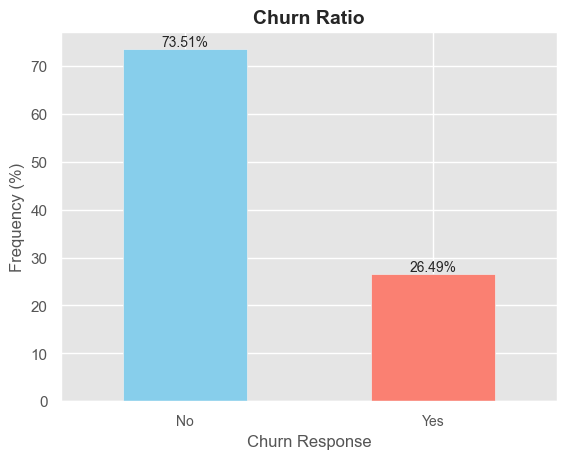

In [44]:
# Finding the value counts in the 'Churn' column
print("Value counts for the 'Churn' column:")
churn_counts = traindata["Churn"].value_counts()
print(f'{churn_counts}')




# Calculate churn ratio to gain insights into the 'Churn' column
churn_ratio = 100 * traindata['Churn'].value_counts() / len(traindata['Churn'])



# Plotting the churn ratio as a bar chart
fig, ax = plt.subplots()
churn_ratio.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])

# Enhancing the plot's appearance
ax.set_title('Churn Ratio', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn Response', fontsize=12)
ax.set_ylabel('Frequency (%)', fontsize=12)
ax.set_xticklabels(['No', 'Yes'], rotation=0, fontsize=10)
ax.bar_label(ax.containers[0], fmt='%.2f%%')  # Adding labels on top of bars

# Display the plot
plt.show()

Number of customers who churned by gender:
gender
Male      675
Female    661
Name: count, dtype: int64


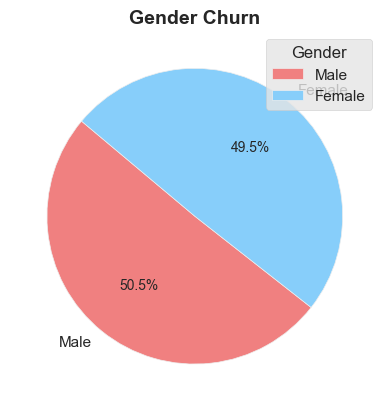

In [47]:
# Counting the number of males and females who churned
churn_counts = traindata[traindata['Churn'] == 1]['gender'].value_counts()

# Display the results with clear labels
print("Number of customers who churned by gender:")
print(churn_counts)

# Plotting the gender churn as a pie chart
fig, ax = plt.subplots()
colors = ['lightcoral', 'lightskyblue']
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax, startangle=140)

# Enhancing the plot's appearance
ax.set_title('Gender Churn', fontsize=14, fontweight='bold')
ax.set_ylabel('')  # Remove the y-label for better appearance
ax.legend(labels=churn_counts.index, loc='upper right', title="Gender")

# Display the plot
plt.show()

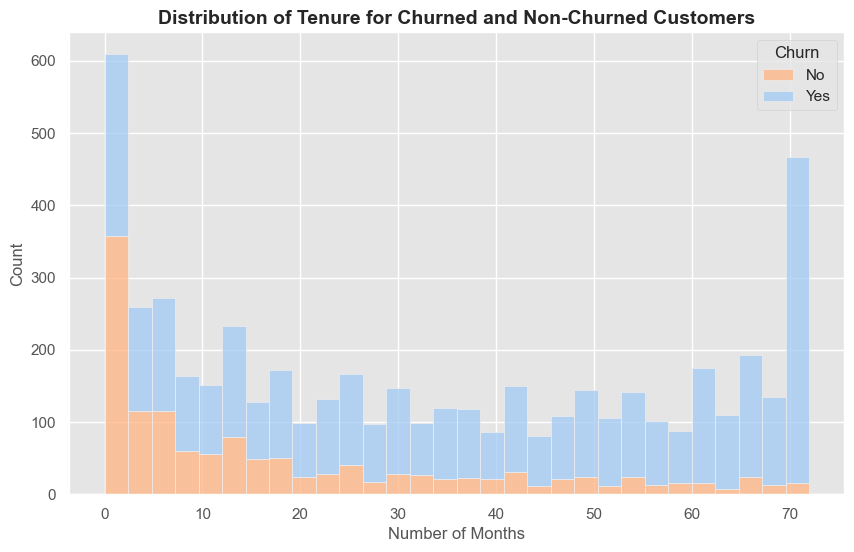

Average tenure for churned and non-churned customers:
Churn
0    37.742919
1    18.241766
Name: tenure, dtype: float64


In [49]:
# Plotting the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=traindata, x='tenure', hue='Churn', multiple='stack', bins=30, palette='pastel')

# Enhancing the plot's appearance
plt.title('Distribution of Tenure for Churned and Non-Churned Customers', fontsize=14, fontweight='bold')
plt.xlabel('Number of Months', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Calculating and displaying the average tenure for churned and non-churned customers
avg_tenure = traindata.groupby('Churn')['tenure'].mean()
print("Average tenure for churned and non-churned customers:")
print(avg_tenure)

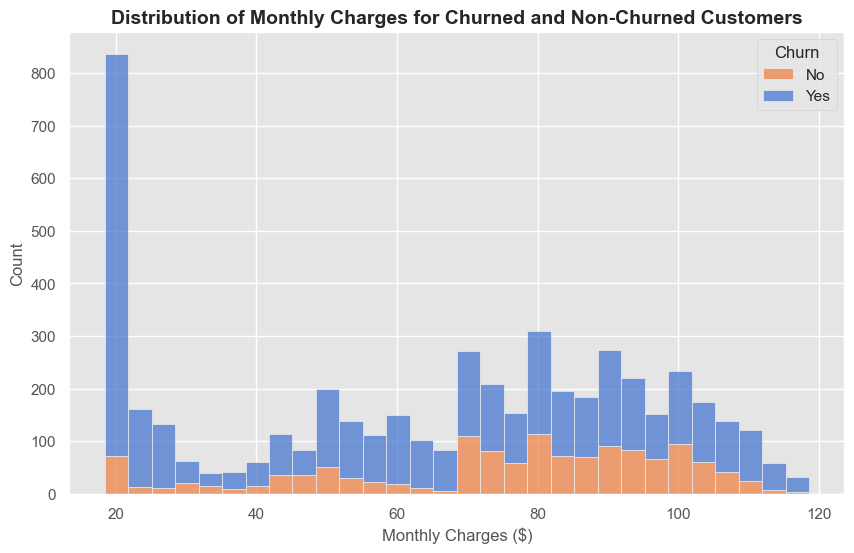

Average monthly charges for churned and non-churned customers:
Churn
0    61.442690
1    75.211003
Name: MonthlyCharges, dtype: float64


In [50]:
# Plotting the distribution of monthly charges for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=traindata, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette='muted')

# Enhancing the plot's appearance
plt.title('Distribution of Monthly Charges for Churned and Non-Churned Customers', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Calculating and displaying the average monthly charges for churned and non-churned customers
avg_monthly_charges = traindata.groupby('Churn')['MonthlyCharges'].mean()
print("Average monthly charges for churned and non-churned customers:")
print(avg_monthly_charges)

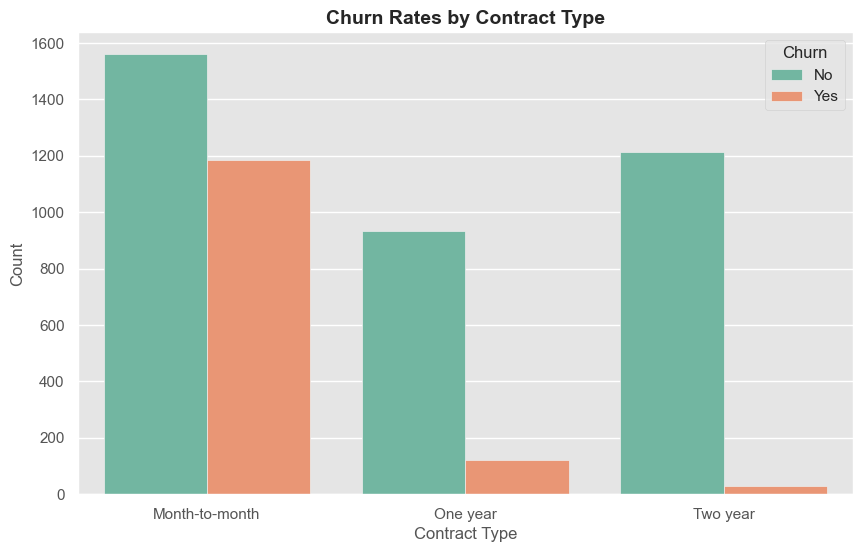

In [51]:
# Creating bar plots showing churn rates for different contract types
plt.figure(figsize=(10, 6))
sns.countplot(data=traindata, x='Contract', hue='Churn', palette='Set2')

# Enhancing the plot's appearance
plt.title('Churn Rates by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Ensuring x-axis labels are horizontal for better readability

# Display the plot
plt.show()

C:\Users\bb\AppData\Local\Temp\ipykernel_11080\1554886450.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Contract', y='MonthlyCharges', data=traindata, palette='coolwarm')


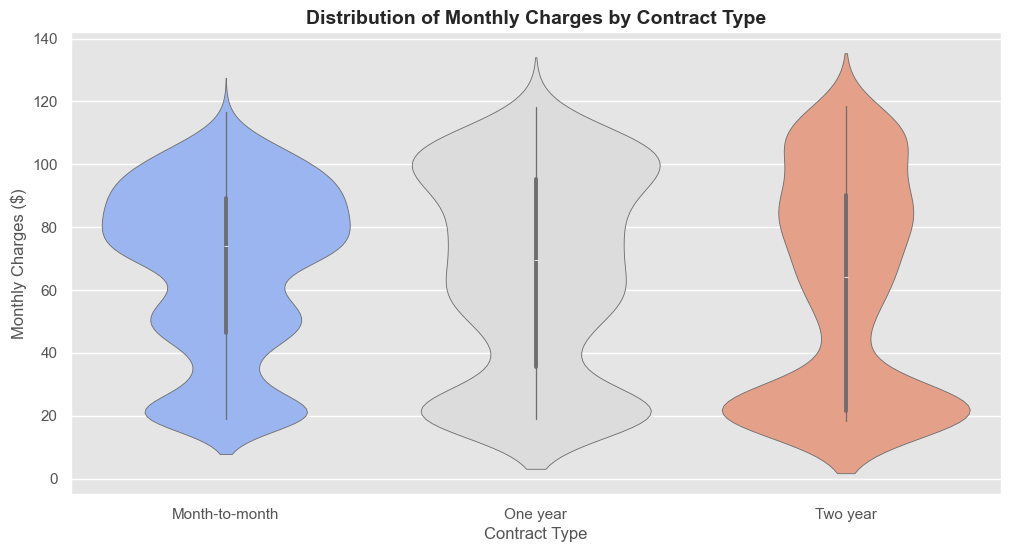

In [54]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot to show distribution of Monthly Charges by Contract Type
sns.violinplot(x='Contract', y='MonthlyCharges', data=traindata, palette='coolwarm')

# Enhancing the plot's appearance
plt.title('Distribution of Monthly Charges by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)

# Display the plot
plt.show()

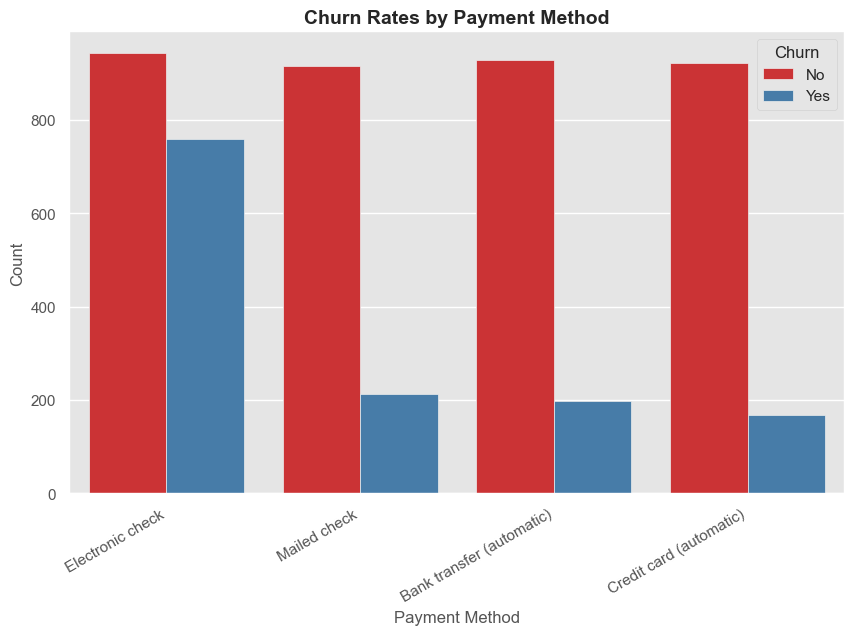

In [52]:
# Analyzing how payment methods impact churn by creating bar plots
plt.figure(figsize=(10, 6))
sns.countplot(data=traindata, x='PaymentMethod', hue='Churn', palette='Set1')

# Enhancing the plot's appearance
plt.title('Churn Rates by Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')  # Adjusting rotation and alignment for better readability
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()


**B. Bivariate Analysis:**
Explore, analyze and visualize the relationship among the variables


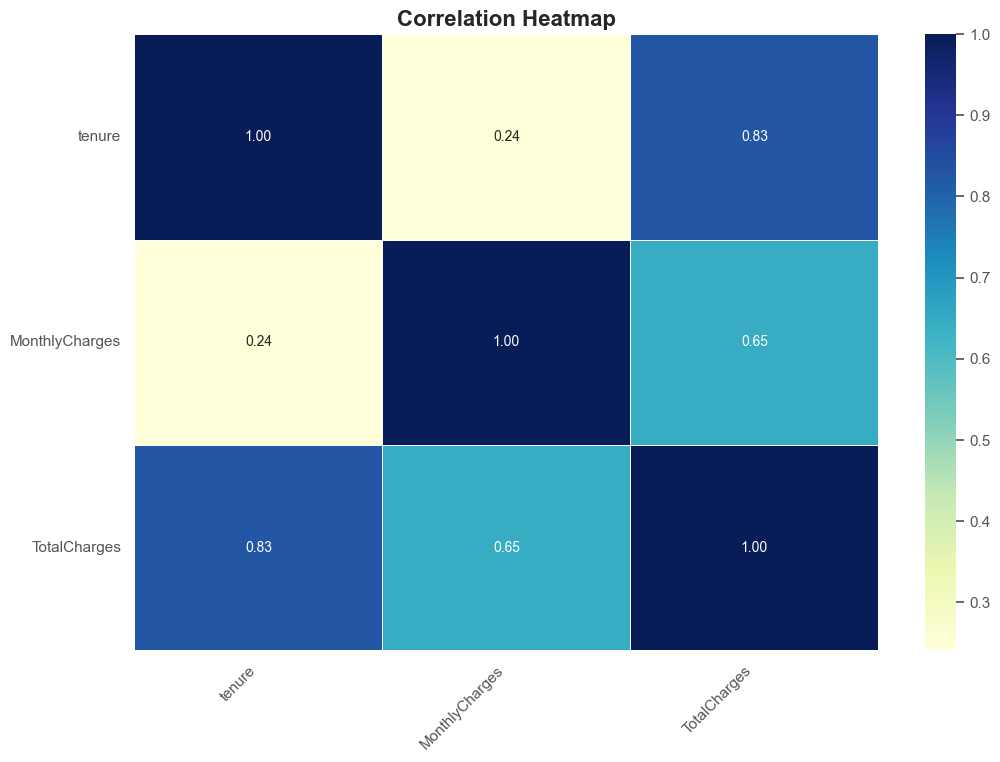

In [55]:
# Generate the correlation matrix, excluding non-numeric columns
corr_matrix = traindata.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)

# Enhancing the plot's appearance
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Adjusting x-axis labels for better readability
plt.yticks(rotation=0)

# Display the plot
plt.show()

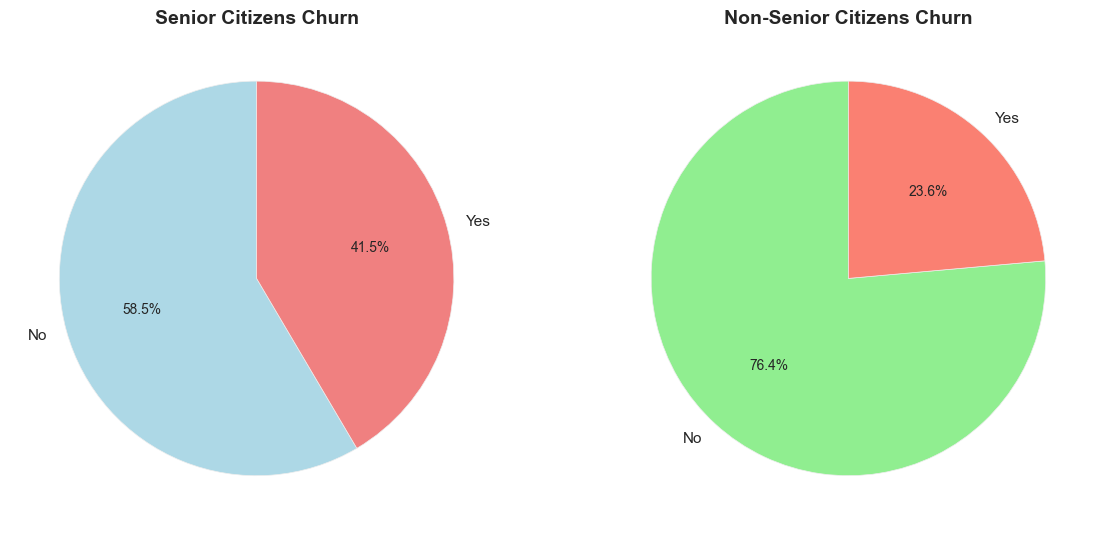

In [57]:
# Counting churn values for senior and non-senior citizens
senior_churn = traindata[traindata['SeniorCitizen'] == 'Yes']['Churn'].value_counts()
non_senior_churn = traindata[traindata['SeniorCitizen'] == 'No']['Churn'].value_counts()

# Plotting pie charts for Senior and Non-Senior Citizens' churn
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Senior Citizens
ax[0].pie(senior_churn, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax[0].set_title('Senior Citizens Churn', fontsize=14, fontweight='bold')

# Pie chart for Non-Senior Citizens
ax[1].pie(non_senior_churn, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
ax[1].set_title('Non-Senior Citizens Churn', fontsize=14, fontweight='bold')

# Display the plots
plt.show()

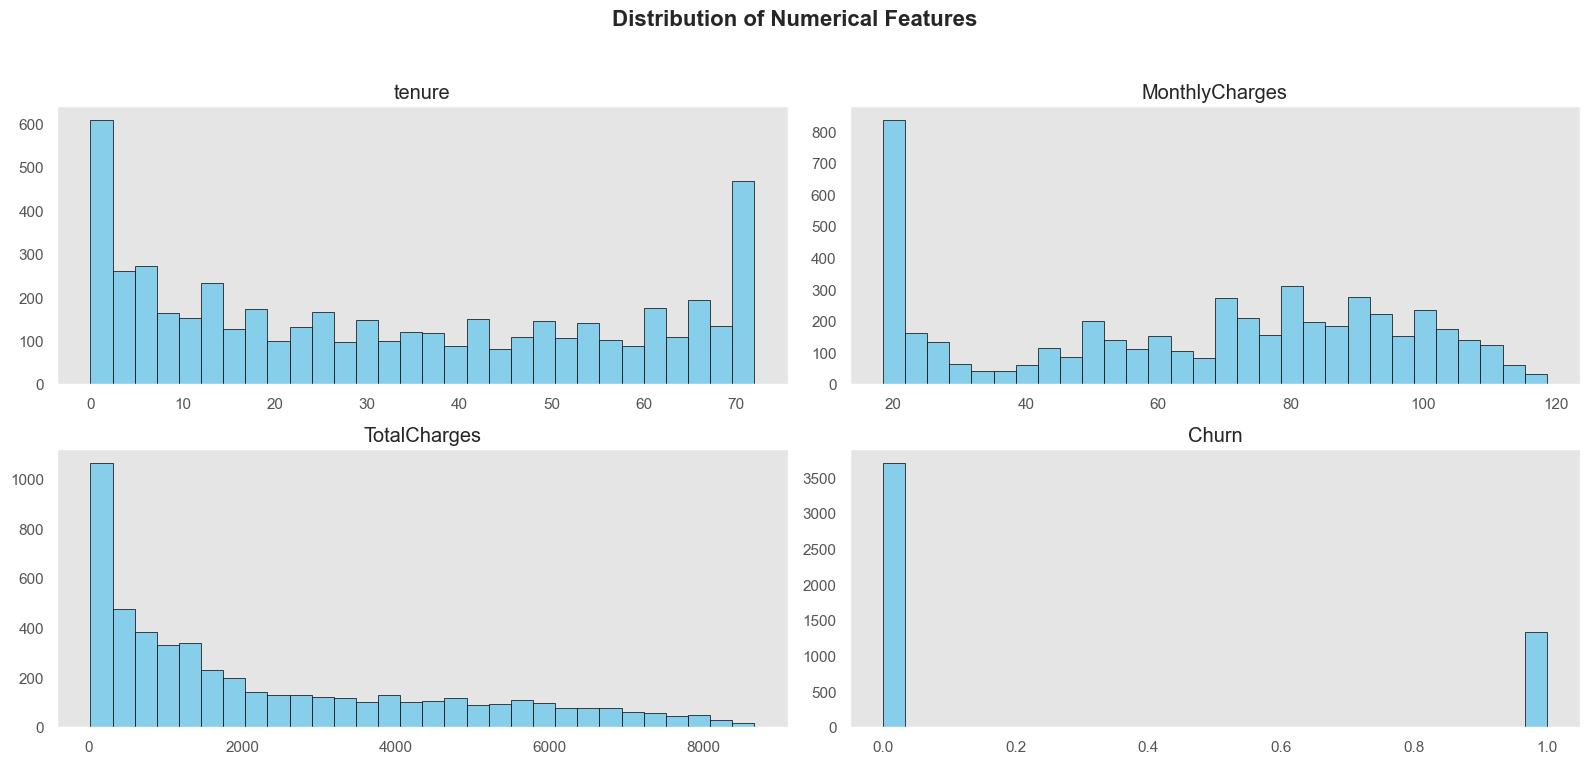

In [58]:
# Creating histograms for all numerical columns
traindata.hist(figsize=(16, 8), grid=False, color='Skyblue', bins=30, edgecolor='black')

# Enhancing the overall appearance of the plots
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title and prevent overlap

# Display the plots
plt.show()

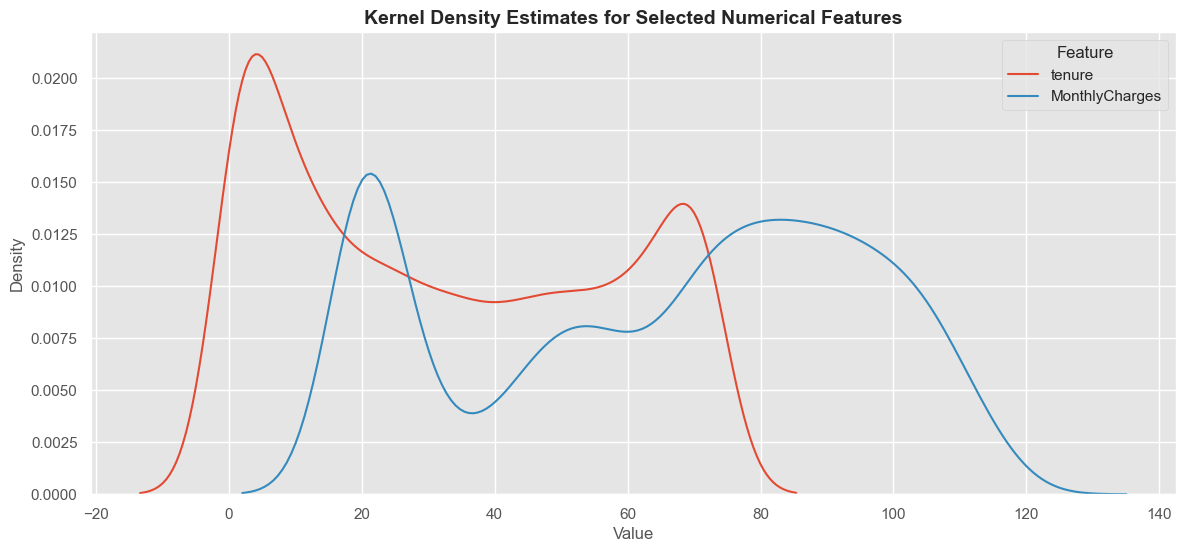

In [61]:
# Select numerical columns for KDE plotting, excluding specific columns
columns_to_plot = traindata.drop(["SeniorCitizen", "Churn", "TotalCharges"], axis=1).select_dtypes(include=['float64', 'int64']).columns

# Plot KDE for each selected numerical column
plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    sns.kdeplot(traindata[column], label=column)

# Enhancing the plot's appearance
plt.title('Kernel Density Estimates for Selected Numerical Features', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Feature')

# Display the plot
plt.show()

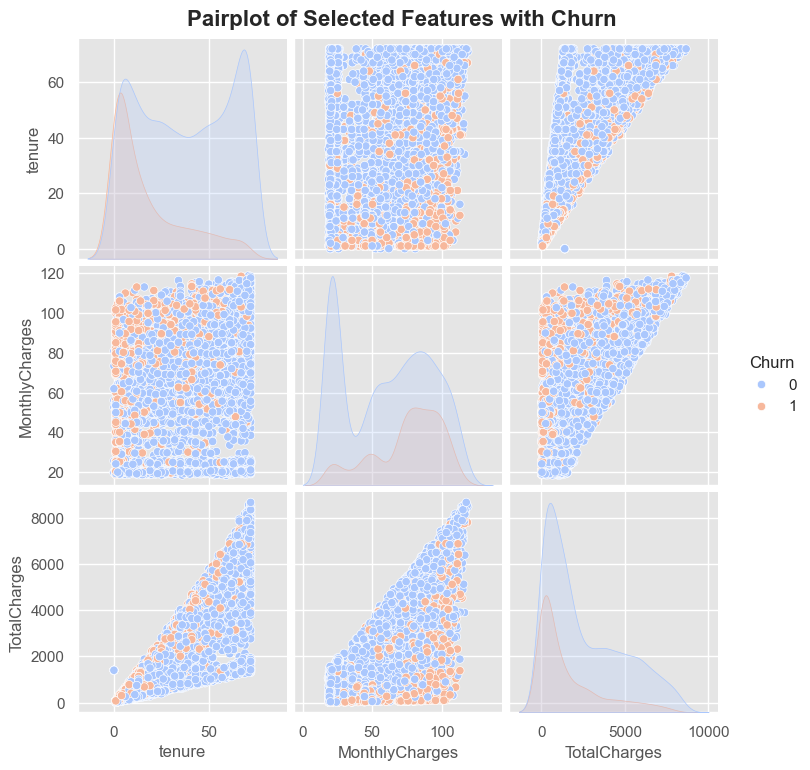

In [63]:
# Selecting a subset of numerical columns for the pairplot
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Creating a pairplot for the selected columns
sns.pairplot(traindata[columns_to_plot], hue='Churn', palette='coolwarm', diag_kind='kde')

# Enhancing the plot's appearance
plt.suptitle('Pairplot of Selected Features with Churn', y=1.02, fontsize=16, fontweight='bold')

# Display the pairplot
plt.show()

` Answering the Hypothetical Questions Asked`
#### we aim to understand whether the length of time a customer has been with the company (tenure) affects their likelihood of churning. To test this, we will perform a hypothesis test to determine if there is a significant difference in churn rates based on the tenure of the customer.

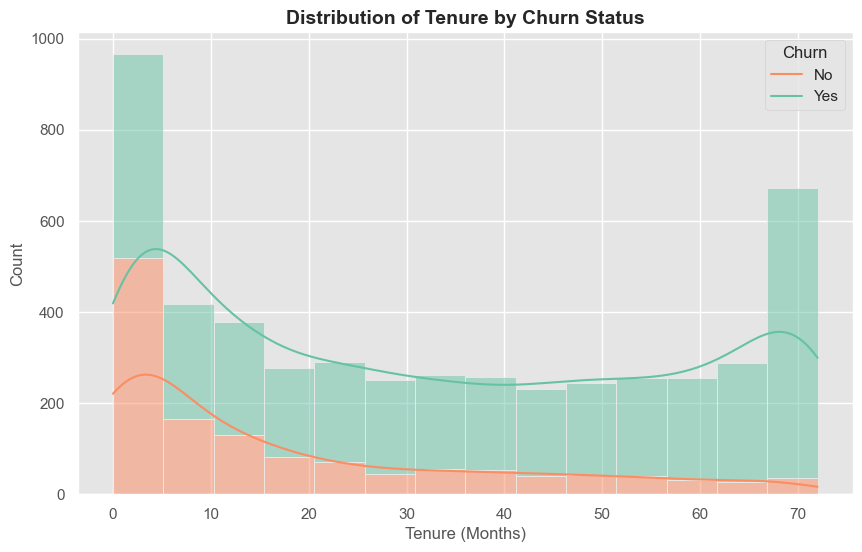

In [64]:
# Plot the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=traindata, x='tenure', hue='Churn', multiple='stack', kde=True, palette='Set2')

# Enhancing the plot's appearance
plt.title('Distribution of Tenure by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

` we use a t-test to compare the means of the tenure for churned and non-churned customers. `

In [65]:
# Perform t-test to compare the means of tenure for churned and non-churned customers
churned = traindata[traindata['Churn'] == 1]['tenure']
not_churned = traindata[traindata['Churn'] == 0]['tenure']

# Calculate the t-statistic and p-value
t_stat, p_value = ttest_ind(churned, not_churned)

# Display the results with interpretation
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference in tenure between churned and non-churned customers is statistically significant.")
else:
    print("There is no statistically significant difference in tenure between churned and non-churned customers.")

T-Statistic: -26.60
P-Value: 0.00000
The difference in tenure between churned and non-churned customers is statistically significant.


## 1. How does customer churn vary across different Genders?

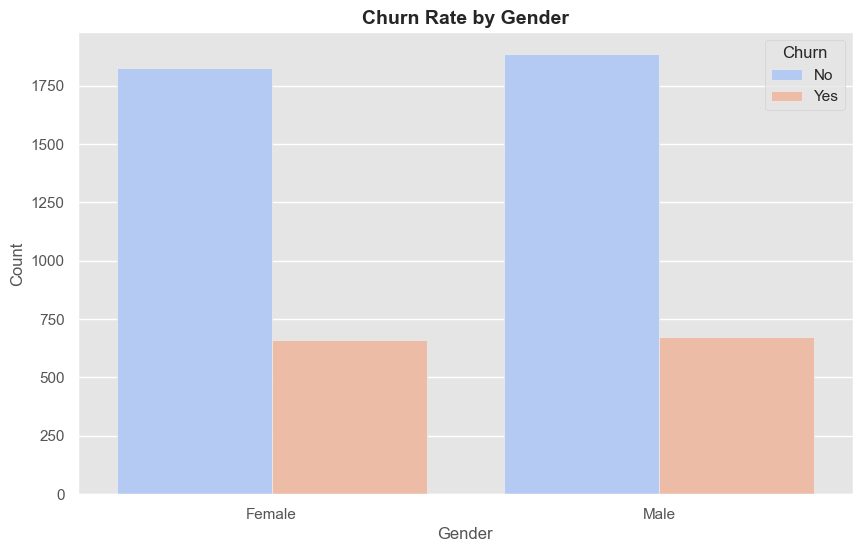

In [67]:
# Plot churn rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=traindata, x='gender', hue='Churn', palette='coolwarm')

# Enhancing the plot's appearance
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

## 2. What impact do different service offerings have on customer churn?

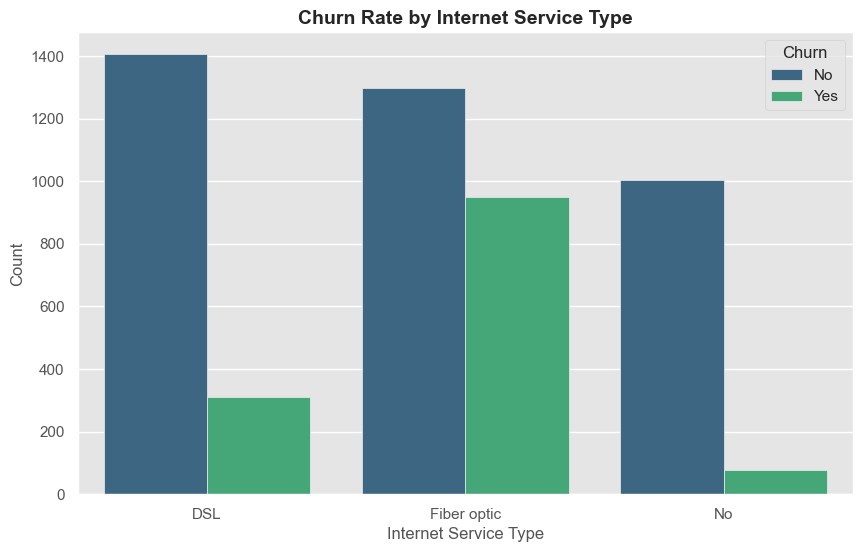

In [68]:
# Plot churn rate by internet service type
plt.figure(figsize=(10, 6))
sns.countplot(data=traindata, x='InternetService', hue='Churn', palette='viridis')

# Enhancing the plot's appearance
plt.title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

## 3. How effective are customer support interactions in reducing churn?

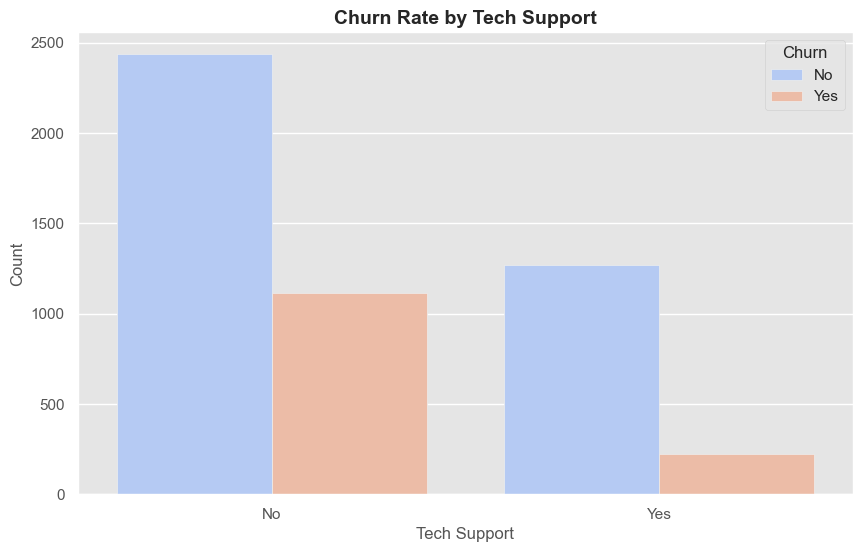

In [69]:
# Transforming the TechSupport column for visualization
traindata['TechSupport'] = traindata['TechSupport'].replace({True: 'Yes', False: 'No', 'No internet service': 'No'})

# Plot churn rate by tech support usage
plt.figure(figsize=(10, 6))
sns.countplot(data=traindata, x='TechSupport', hue='Churn', palette='coolwarm')

# Enhancing the plot's appearance
plt.title('Churn Rate by Tech Support', fontsize=14, fontweight='bold')
plt.xlabel('Tech Support', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

## 4. What are the reasons behind the differences in churn rates among various contract types?

### Model Ranking:


**1. Logistic Regression**

- Accuracy: 0.82
- Precision: 0.87 (for class 0), 0.67 (for class 1)
- Recall: 0.89 (for class 0), 0.60 (for class 1)
- F1-Score: 0.88 (for class 0), 0.63 (for class 1)
- RMSE: 0.43

*Performance Summary:*
- Logistic Regression ranks highest due to the highest accuracy, balanced precision and recall, and the best F1-Score for class 1. It provides the most consistent performance across all metrics, making it the best choice for the given task.

**2. Random Forest**

- Accuracy: 0.81
- Precision: 0.84 (for class 0), 0.67 (for class 1)
- Recall: 0.91 (for class 0), 0.52 (for class 1)
- F1-Score: 0.88 (for class 0), 0.58 (for class 1)
- RMSE: 0.44

*Performance Summary:*
- Random Forest closely follows Logistic Regression but suffers from lower recall and F1-Score for class 1. Despite being highly accurate for class 0, its performance for class 1 could be improved.

**3. Support Vector Machine (SVM)**

- Accuracy: 0.81
- Precision: 0.84 (for class 0), 0.69 (for class 1)
- Recall: 0.92 (for class 0), 0.49 (for class 1)
- F1-Score: 0.88 (for class 0), 0.58 (for class 1)
- RMSE: 0.43

*Performance Summary:*
- The SVM model offers a similar performance to Random Forest, but it achieves slightly better precision for class 1. However, its recall for class 1 is lower, leading to an overall similar ranking.

**4. K-Nearest Neighbors (KNN)**

- Accuracy: 0.80
- Precision: 0.86 (for class 0), 0.62 (for class 1)
- Recall: 0.87 (for class 0), 0.61 (for class 1)
- F1-Score: 0.87 (for class 0), 0.61 (for class 1)
- RMSE: 0.45

*Performance Summary:*
- KNN is slightly better than Decision Tree, offering a balance between precision and recall for both classes, but it ranks lower due to lower precision for class 1 compared to SVM and Random Forest.


**5. Decision Tree**

- Accuracy: 0.78
- Precision: 0.85 (for class 0), 0.59 (for class 1)
- Recall: 0.86 (for class 0), 0.56 (for class 1)
- F1-Score: 0.86 (for class 0), 0.57 (for class 1)
- RMSE: 0.46

*Performance Summary:*
- The Decision Tree model shows lower performance across all metrics compared to the other models, particularly in precision and recall for class 1. It has the highest RMSE, indicating less accuracy in predictions.


#### Summary of Rankings:
- Logistic Regression is the best model overall due to its superior accuracy, precision, recall, and F1-Score, especially for class 1.
- Random Forest and SVM are close contenders, with Random Forest excelling in recall for class 0 and SVM providing better precision for class 1.
- KNN and Decision Tree rank lower due to their less balanced performance across metrics.


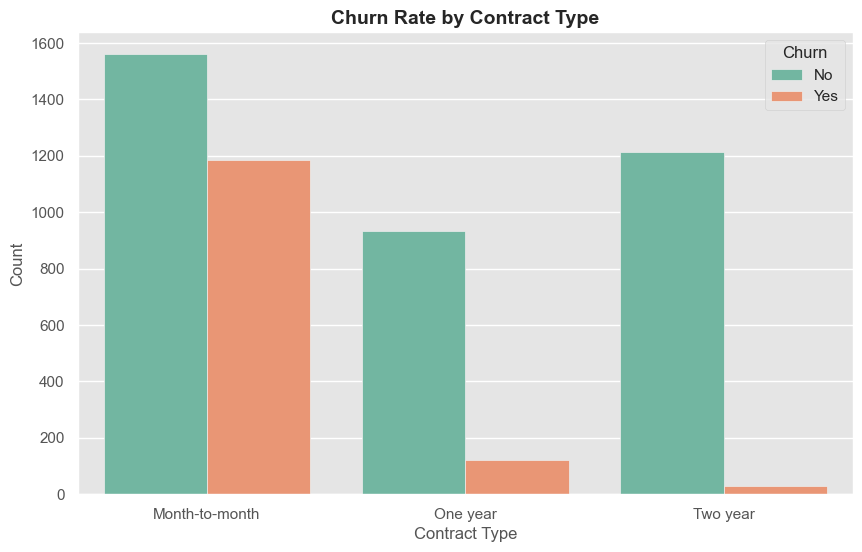

In [70]:
# Plot churn rate by contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=traindata, x='Contract', hue='Churn', palette='Set2')

# Enhancing the plot's appearance
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

In [ ]:
train_data.columns

`Save Clean Data`

In [ ]:
# Save the processed dataset to a CSV file
output_file = r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv"

if os.path.exists(output_file):
    print(f"Warning: {output_file} will be overwritten.")

train_data.to_csv(output_file, index=False)
print(f"Processed dataset saved to {output_file}.")

In [ ]:
# Load the processed dataset
train_data = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv")

# Confirm successful loading of the dataset
print(f"Dataset loaded successfully with {train_data.shape[0]} rows and {train_data.shape[1]} columns.")


`**Build Pipeline**

In [ ]:
# Define the columns
categorical_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaperlessBilling', 'gender', 'InternetService', 
    'Contract', 'PaymentMethod'
]

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Convert 'Yes'/'No' values to 1/0 using OneHotEncoder with drop='if_binary'
boolean_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

# Add boolean transformer separately for boolean columns
preprocessor = ColumnTransformer(
    transformers=[
        ('bool', boolean_transformer, categorical_cols[:11]),  
        ('cat', categorical_transformer, categorical_cols[11:]),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on your training data
pipeline.fit(train_data)

# Transform the training data using the fitted pipeline
train_data_transformed = pipeline.transform(train_data)

# Convert the transformed data back into a DataFrame (optional)
transformed_columns = list(pipeline.named_steps['preprocessor'].get_feature_names_out())
train_data_transformed_df = pd.DataFrame(train_data_transformed, columns=transformed_columns)

# Save the pipeline
joblib.dump(pipeline, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\preprocessor_pipeline.pkl')
print("Pipeline saved as 'preprocessor_pipeline.pkl'")

## MODEL TRAINING AND EVALUATION

In [ ]:
# Split the data into training and validation sets
X = train_data_transformed_df
y = train_data['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression 
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# Predict on validation data
y_val_pred = log_reg.predict(X_val)

# Evaluate the model
print("Logistic Regression Model Evaluation (Without Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Bar plot for evaluation metrics
metrics = {'RMSE': rmse, 'RMSLE': rmsle, 'R^2': r2, 'Accuracy': accuracy}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Logistic Regression (Without Hyperparameter Tuning)')
plt.show()


In [ ]:
# Set up the Logistic Regression model with hyperparameter tuning
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Train the best model on the full training data
best_log_reg.fit(X_train, y_train)

# Predict on validation data
y_val_pred_tuned = best_log_reg.predict(X_val)

# Evaluate the model after hyperparameter tuning
print("Logistic Regression Model Evaluation (With Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_tuned))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tuned))

# Compute evaluation metrics after hyperparameter tuning
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
rmsle_tuned = np.sqrt(mean_squared_log_error(y_val, y_val_pred_tuned))
r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"RMSE: {rmse_tuned:.2f}")
print(f"RMSLE: {rmsle_tuned:.2f}")
print(f"R^2: {r2_tuned:.2f}")
print(f"Accuracy: {accuracy_tuned:.2f}")

# Bar plot for evaluation metrics after hyperparameter tuning
metrics_tuned = {'RMSE': rmse_tuned, 'RMSLE': rmsle_tuned, 'R^2': r2_tuned, 'Accuracy': accuracy_tuned}
plt.figure(figsize=(8, 5))
plt.bar(metrics_tuned.keys(), metrics_tuned.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Logistic Regression (With Hyperparameter Tuning)')
plt.show()


In [ ]:
# Train Random Forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on validation data
y_val_pred = rf.predict(X_val)

# Evaluate the model
print("Random Forest Model Evaluation (Without Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Bar plot for evaluation metrics
metrics = {'RMSE': rmse, 'RMSLE': rmsle, 'R^2': r2, 'Accuracy': accuracy}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Random Forest (Without Hyperparameter Tuning)')
plt.show()


In [ ]:
# Set up the Random Forest model with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Train the best model on the full training data
best_rf.fit(X_train, y_train)

# Predict on validation data
y_val_pred_tuned = best_rf.predict(X_val)

# Evaluate the model after hyperparameter tuning
print("Random Forest Model Evaluation (With Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_tuned))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tuned))

# Compute evaluation metrics after hyperparameter tuning
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
rmsle_tuned = np.sqrt(mean_squared_log_error(y_val, y_val_pred_tuned))
r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"RMSE: {rmse_tuned:.2f}")
print(f"RMSLE: {rmsle_tuned:.2f}")
print(f"R^2: {r2_tuned:.2f}")
print(f"Accuracy: {accuracy_tuned:.2f}")

# Bar plot for evaluation metrics after hyperparameter tuning
metrics_tuned = {'RMSE': rmse_tuned, 'RMSLE': rmsle_tuned, 'R^2': r2_tuned, 'Accuracy': accuracy_tuned}
plt.figure(figsize=(8, 5))
plt.bar(metrics_tuned.keys(), metrics_tuned.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Random Forest (With Hyperparameter Tuning)')
plt.show()


In [ ]:
# Train SVM 
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict on validation data
y_val_pred = svm.predict(X_val)

# Evaluate the model
print("Support Vector Machine Model Evaluation (Without Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Bar plot for evaluation metrics
metrics = {'RMSE': rmse, 'RMSLE': rmsle, 'R^2': r2, 'Accuracy': accuracy}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for SVM (Without Hyperparameter Tuning)')
plt.show()


In [ ]:
# Set up the SVM model with hyperparameter tuning
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_svm = grid_search.best_estimator_

# Train the best model on the full training data
best_svm.fit(X_train, y_train)

# Predict on validation data
y_val_pred_tuned = best_svm.predict(X_val)

# Evaluate the model after hyperparameter tuning
print("Support Vector Machine Model Evaluation (With Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_tuned))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tuned))

# Compute evaluation metrics after hyperparameter tuning
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
rmsle_tuned = np.sqrt(mean_squared_log_error(y_val, y_val_pred_tuned))
r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"RMSE: {rmse_tuned:.2f}")
print(f"RMSLE: {rmsle_tuned:.2f}")
print(f"R^2: {r2_tuned:.2f}")
print(f"Accuracy: {accuracy_tuned:.2f}")

# Bar plot for evaluation metrics after hyperparameter tuning
metrics_tuned = {'RMSE': rmse_tuned, 'RMSLE': rmsle_tuned, 'R^2': r2_tuned, 'Accuracy': accuracy_tuned}
plt.figure(figsize=(8, 5))
plt.bar(metrics_tuned.keys(), metrics_tuned.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for SVM (With Hyperparameter Tuning)')
plt.show()


In [ ]:
# Train Decision Tree 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on validation data
y_val_pred = dt.predict(X_val)

# Evaluate the model
print("Decision Tree Model Evaluation (Without Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Bar plot for evaluation metrics
metrics = {'RMSE': rmse, 'RMSLE': rmsle, 'R^2': r2, 'Accuracy': accuracy}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Decision Tree (Without Hyperparameter Tuning)')
plt.show()


In [ ]:
# Set up the Decision Tree model with hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_dt = grid_search.best_estimator_

# Train the best model on the full training data
best_dt.fit(X_train, y_train)

# Predict on validation data
y_val_pred_tuned = best_dt.predict(X_val)

# Evaluate the model after hyperparameter tuning
print("Decision Tree Model Evaluation (With Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_tuned))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tuned))

# Compute evaluation metrics after hyperparameter tuning
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
rmsle_tuned = np.sqrt(mean_squared_log_error(y_val, y_val_pred_tuned))
r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"RMSE: {rmse_tuned:.2f}")
print(f"RMSLE: {rmsle_tuned:.2f}")
print(f"R^2: {r2_tuned:.2f}")
print(f"Accuracy: {accuracy_tuned:.2f}")

# Bar plot for evaluation metrics after hyperparameter tuning
metrics_tuned = {'RMSE': rmse_tuned, 'RMSLE': rmsle_tuned, 'R^2': r2_tuned, 'Accuracy': accuracy_tuned}
plt.figure(figsize=(8, 5))
plt.bar(metrics_tuned.keys(), metrics_tuned.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for Decision Tree (With Hyperparameter Tuning)')
plt.show()


In [ ]:
# Train KNN without hyperparameter tuning
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on validation data
y_val_pred = knn.predict(X_val)

# Evaluate the model
print("K-Nearest Neighbors Model Evaluation (Without Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Compute evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Bar plot for evaluation metrics
metrics = {'RMSE': rmse, 'RMSLE': rmsle, 'R^2': r2, 'Accuracy': accuracy}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for KNN (Without Hyperparameter Tuning)')
plt.show()


In [ ]:
# Set up the KNN model with hyperparameter tuning
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Train the best model on the full training data
best_knn.fit(X_train, y_train)

# Predict on validation data
y_val_pred_tuned = best_knn.predict(X_val)

# Evaluate the model after hyperparameter tuning
print("K-Nearest Neighbors Model Evaluation (With Hyperparameter Tuning)")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_tuned))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tuned))

# Compute evaluation metrics after hyperparameter tuning
accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
rmsle_tuned = np.sqrt(mean_squared_log_error(y_val, y_val_pred_tuned))
r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"RMSE: {rmse_tuned:.2f}")
print(f"RMSLE: {rmsle_tuned:.2f}")
print(f"R^2: {r2_tuned:.2f}")
print(f"Accuracy: {accuracy_tuned:.2f}")

# Bar plot for evaluation metrics after hyperparameter tuning
metrics_tuned = {'RMSE': rmse_tuned, 'RMSLE': rmsle_tuned, 'R^2': r2_tuned, 'Accuracy': accuracy_tuned}
plt.figure(figsize=(8, 5))
plt.bar(metrics_tuned.keys(), metrics_tuned.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics for KNN (With Hyperparameter Tuning)')
plt.show()


### Model Ranking:


**1. Logistic Regression**

- Accuracy: 0.82
- Precision: 0.87 (for class 0), 0.67 (for class 1)
- Recall: 0.89 (for class 0), 0.60 (for class 1)
- F1-Score: 0.88 (for class 0), 0.63 (for class 1)
- RMSE: 0.43

*Performance Summary:*
- Logistic Regression ranks highest due to the highest accuracy, balanced precision and recall, and the best F1-Score for class 1. It provides the most consistent performance across all metrics, making it the best choice for the given task.

**2. Random Forest**

- Accuracy: 0.81
- Precision: 0.84 (for class 0), 0.67 (for class 1)
- Recall: 0.91 (for class 0), 0.52 (for class 1)
- F1-Score: 0.88 (for class 0), 0.58 (for class 1)
- RMSE: 0.44

*Performance Summary:*
- Random Forest closely follows Logistic Regression but suffers from lower recall and F1-Score for class 1. Despite being highly accurate for class 0, its performance for class 1 could be improved.

**3. Support Vector Machine (SVM)**

- Accuracy: 0.81
- Precision: 0.84 (for class 0), 0.69 (for class 1)
- Recall: 0.92 (for class 0), 0.49 (for class 1)
- F1-Score: 0.88 (for class 0), 0.58 (for class 1)
- RMSE: 0.43

*Performance Summary:*
- The SVM model offers a similar performance to Random Forest, but it achieves slightly better precision for class 1. However, its recall for class 1 is lower, leading to an overall similar ranking.

**4. K-Nearest Neighbors (KNN)**

- Accuracy: 0.80
- Precision: 0.86 (for class 0), 0.62 (for class 1)
- Recall: 0.87 (for class 0), 0.61 (for class 1)
- F1-Score: 0.87 (for class 0), 0.61 (for class 1)
- RMSE: 0.45

*Performance Summary:*
- KNN is slightly better than Decision Tree, offering a balance between precision and recall for both classes, but it ranks lower due to lower precision for class 1 compared to SVM and Random Forest.


**5. Decision Tree**

- Accuracy: 0.78
- Precision: 0.85 (for class 0), 0.59 (for class 1)
- Recall: 0.86 (for class 0), 0.56 (for class 1)
- F1-Score: 0.86 (for class 0), 0.57 (for class 1)
- RMSE: 0.46

*Performance Summary:*
- The Decision Tree model shows lower performance across all metrics compared to the other models, particularly in precision and recall for class 1. It has the highest RMSE, indicating less accuracy in predictions.


#### Summary of Rankings:
- Logistic Regression is the best model overall due to its superior accuracy, precision, recall, and F1-Score, especially for class 1.
- Random Forest and SVM are close contenders, with Random Forest excelling in recall for class 0 and SVM providing better precision for class 1.
- KNN and Decision Tree rank lower due to their less balanced performance across metrics.


### Save Trained Models

In [ ]:
# After training each model, save them
joblib.dump(best_log_reg, r'C:\Users\bb\Desktop\Azibiafrica\Azubi\LP2\Models\logistic_regression_model.pkl')
joblib.dump(best_rf, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\random_forest_model.pkl')
joblib.dump(best_svm, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\svm_model.pkl')
joblib.dump(best_dt, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\decision_tree_model.pkl')
joblib.dump(best_knn, r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\knn_model.pkl")


### Predicting the Churn column of the test data

In [ ]:
# Load the test data from an Excel file
test_data = pd.read_excel(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx")

In [ ]:
# Check for missing values and data types
print(test_data.info())
print(test_data.isnull().sum())


In [ ]:
# Replace empty strings with NaN
test_data.replace(r'^\s*$', np.nan, regex=True, inplace=True)  
test_data.dropna(inplace=True)  # Drop rows with NaN values

In [ ]:
# Replace both boolean and string representations of True, False, and and any other thing
test_data['StreamingMovies'] = test_data['StreamingMovies'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
})

# Check unique values to confirm the replacement
print(train_data['StreamingMovies'].unique())

In [ ]:
# Path to the output file
output_file = r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx"

# Check if the file already exists
if os.path.exists(output_file):
    print(f"Warning: {output_file} will be overwritten.")

# Save the processed dataset to an Excel file
test_data.to_excel(output_file, index=False)
print(f"Processed dataset saved to {output_file}.")


In [ ]:
# Load the processed dataset
test_data = pd.read_excel(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx")

# Confirm successful loading of the dataset
print(f"Dataset loaded successfully with {test_data.shape[0]} rows and {test_data.shape[1]} columns.")


In [ ]:
# Load the preprocessing pipeline
preprocessor_pipeline = joblib.load(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\preprocessor_pipeline.pkl")

# Load the saved model
logistic_regression_model = joblib.load(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\logistic_regression_model.pkl")

# Preprocess the test data
X_test = preprocessor_pipeline.transform(test_data)

# Predict using the best model
y_test_pred = logistic_regression_model.predict(X_test)

# Add predictions to the test_data DataFrame
test_data['Predicted_Churn'] = y_test_pred

# Display the test data with predictions
print(f"The data for testing the model with the churn column:\n{test_data.head()}")


In [ ]:
# Save the DataFrame to a CSV file
test_data.to_csv(r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\test_data_with_predictions.csv', index=False)

In [ ]:
# Load the processed dataset
predicted_data = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\test_data_with_predictions.csv")

# Confirm successful loading of the dataset
print(f"Dataset loaded successfully with {predicted_data.shape[0]} rows and {predicted_data.shape[1]} columns.")

predicted_data.sample(100)

In [ ]:
pip list